In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [12]:
#data = pd.read_csv('Taxi_Trips.csv')
df = pd.read_csv('Taxi_Trips.csv',usecols=['Trip Start Timestamp','Trip Seconds','Trip Miles','Pickup Community Area' ,'Dropoff Community Area'])
df.head()

,Trip Start Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area
0,01/01/2019 12:00:00 AM,885.0,3.45,NaN,NaN
1,01/01/2019 12:00:00 AM,8.0,0.00,NaN,NaN
2,01/01/2019 12:00:00 AM,960.0,4.90,NaN,NaN
3,01/01/2019 12:00:00 AM,420.0,1.50,NaN,NaN
4,01/01/2019 12:00:00 AM,420.0,0.50,NaN,NaN


In [13]:
df.dropna(subset=['Trip Start Timestamp','Pickup Community Area', 'Dropoff Community Area'],
          axis=0, # axis=0表示删除行；
          how='any', # how=any表示任意一个出现空值，就删掉该行
          inplace=True # inplace=True表示在原df上进行修改；
          )
#df=df[df['Trip Seconds']!=0]
#df=df[df['Trip Miles']>=0.1]

In [14]:
df.describe()

,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area
count,2.144582e+07,2.144744e+07,2.144840e+07,2.144840e+07
mean,8.925462e+02,3.606728e+00,2.686179e+01,2.345418e+01
std,1.490606e+03,6.434219e+00,2.100108e+01,1.839128e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,3.600000e+02,5.900000e-01,8.000000e+00,8.000000e+00
50%,6.000000e+02,1.300000e+00,2.800000e+01,2.400000e+01
75%,1.080000e+03,3.550000e+00,3.200000e+01,3.200000e+01
max,8.640000e+04,3.430530e+03,7.700000e+01,7.700000e+01


In [15]:
df["start"]=df["Trip Start Timestamp"].map(lambda x:x.split(" ")[0])
#df["start"]=pd.to_datetime(df["start"], format='%m/%d/%Y')
#df["year"]=df["start"].dt.isocalendar().year
#df["number of weeks"] =  df["start"].dt.isocalendar().week
#df['weekday'] = df['start'].dt.weekday+1
df=df[['Trip Seconds',"Trip Miles","Pickup Community Area","Dropoff Community Area","start"]]
df

,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,start
16,600.0,0.00,8.0,32.0,01/01/2019
18,1260.0,0.60,77.0,28.0,01/01/2019
19,120.0,0.30,32.0,32.0,01/01/2019
20,360.0,0.80,8.0,8.0,01/01/2019
22,360.0,1.00,8.0,8.0,01/01/2019
...,...,...,...,...,...
24302796,60.0,0.00,28.0,28.0,12/31/2021
24302797,60.0,0.00,76.0,76.0,12/31/2021
24302799,0.0,0.00,76.0,76.0,12/31/2021
24302800,382.0,0.73,8.0,8.0,12/31/2021


In [16]:
df["start"]=pd.to_datetime(df["start"], format='%m/%d/%Y')
df['days in year'] = df['start'].apply(lambda x:x.timetuple().tm_yday)

C:\ProgramData\Anaconda3\envs\SLDA\lib\site-packages\IPython\core\interactiveshell.py:3397: UserWarning: Parsing '31/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


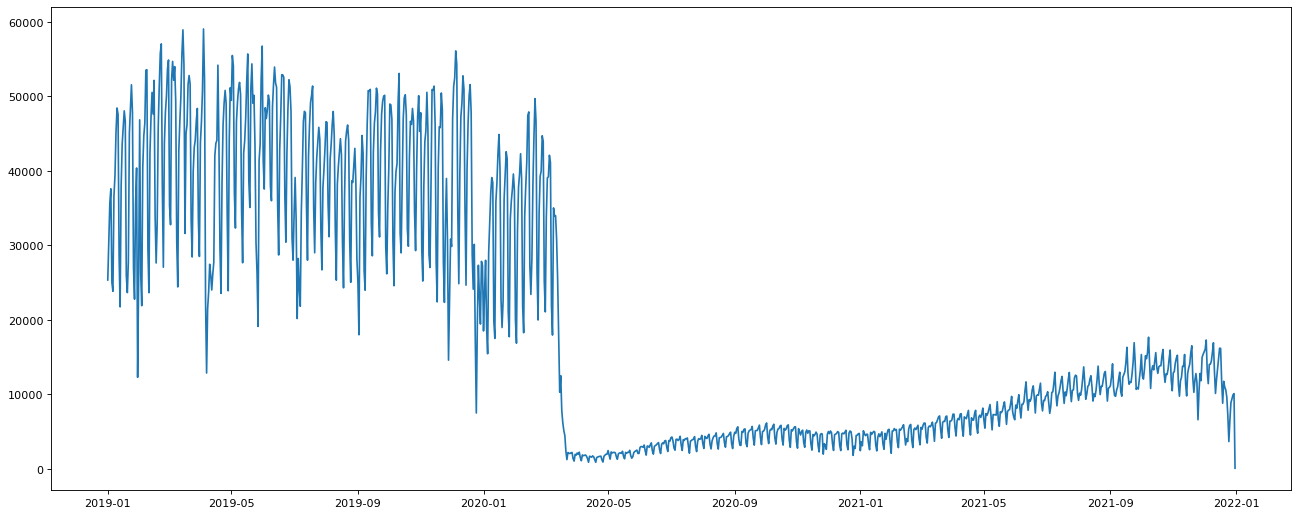

In [17]:
count=df['start'].value_counts()
x=pd.date_range('1/1/2019','31/12/2021')
plt.figure(figsize=(20,8),dpi=80)
plt.plot(x,count[x])

In [28]:
count_area=df['Dropoff Community Area'].groupby(df['Pickup Community Area']).value_counts()
count_area

Pickup Community Area  Dropoff Community Area
1.0                    1.0                       35819
                       77.0                      14418
                       2.0                       13929
                       3.0                        8155
                       8.0                        7594
                                                 ...  
77.0                   54.0                          4
                       62.0                          4
                       52.0                          2
                       55.0                          1
                       74.0                          1
Name: Dropoff Community Area, Length: 5713, dtype: int64

In [29]:
od_list=[]
for i in range(1,78):
    for j in range(1,78):
        if (i,j) in count_area.index:
            if (count_area[i,j]>10000):
                od_list.append((i,j))


In [30]:
odtrips=[]
x=pd.date_range('1/1/2019','31/12/2021')
num_days=len(x)
for i in range(0,len(od_list)):   
    df_area=df[(df["Pickup Community Area"]==od_list[i][0])&(df["Dropoff Community Area"]==od_list[i][1])]
    count_area=df_area['start'].value_counts()
    #array=np.zeros(len(count_area))
    for j in range(1,num_days+1):
        if (x[j-1]) in count_area.index:
            #array[j-1]=count_area[j]
            odtrips.append(count_area[x[j-1]])
        else:
            odtrips.append(0)
            
s=int(len(odtrips)/num_days)
odtrips = np.mat(odtrips).reshape(s,num_days)
odtrips = np.array(odtrips)
odtrips

C:\ProgramData\Anaconda3\envs\SLDA\lib\site-packages\IPython\core\interactiveshell.py:3397: UserWarning: Parsing '31/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[ 66,  37,  41, ...,  20,  13,   0],
       [ 30,  22,  18, ...,   2,   8,   0],
       [ 43,  17,  19, ...,   9,  10,   0],
       ...,
       [ 25,  30,  29, ...,  18,  19,   0],
       [  4,  22,  27, ...,   6,  12,   0],
       [105,  89, 133, ...,  45,  57,   0]], dtype=int64)

In [31]:
odtrips=odtrips/np.max(odtrips)

In [32]:
odtrips

array([[0.00575966, 0.0032289 , 0.00357797, ..., 0.00174535, 0.00113448,
        0.        ],
       [0.00261803, 0.00191989, 0.00157082, ..., 0.00017454, 0.00069814,
        0.        ],
       [0.00375251, 0.00148355, 0.00165809, ..., 0.00078541, 0.00087268,
        0.        ],
       ...,
       [0.00218169, 0.00261803, 0.00253076, ..., 0.00157082, 0.00165809,
        0.        ],
       [0.00034907, 0.00191989, 0.00235623, ..., 0.00052361, 0.00104721,
        0.        ],
       [0.0091631 , 0.00776682, 0.0116066 , ..., 0.00392704, 0.00497426,
        0.        ]])

In [33]:
import sys
from clustering import DTWClustering

%matplotlib inline

4 Cluster

In [34]:
model = DTWClustering(odtrips, 4)
model.train()

0.0010111999999935506 queue placement complete
693.6464696 computations complete
693.6487312000002 iteration complete
0.0005224000001362583 queue placement complete
511.2468695 computations complete
511.2495059999999 iteration complete
0.00037320000001273 queue placement complete
450.53239159999976 computations complete
450.53585810000004 iteration complete
0.0005983000000924221 queue placement complete
419.51222270000017 computations complete
419.5146315000002 iteration complete
0.0003608000001804612 queue placement complete
416.09472129999995 computations complete
416.09689530000014 iteration complete
0.0003907000000253902 queue placement complete
410.8133366000002 computations complete
410.81603819999964 iteration complete
0.0003862000003209687 queue placement complete
402.68491150000045 computations complete
402.6872400000002 iteration complete
0.0003654000001915847 queue placement complete
402.8163482 computations complete
402.8186247000003 iteration complete
0.0003860999995595193

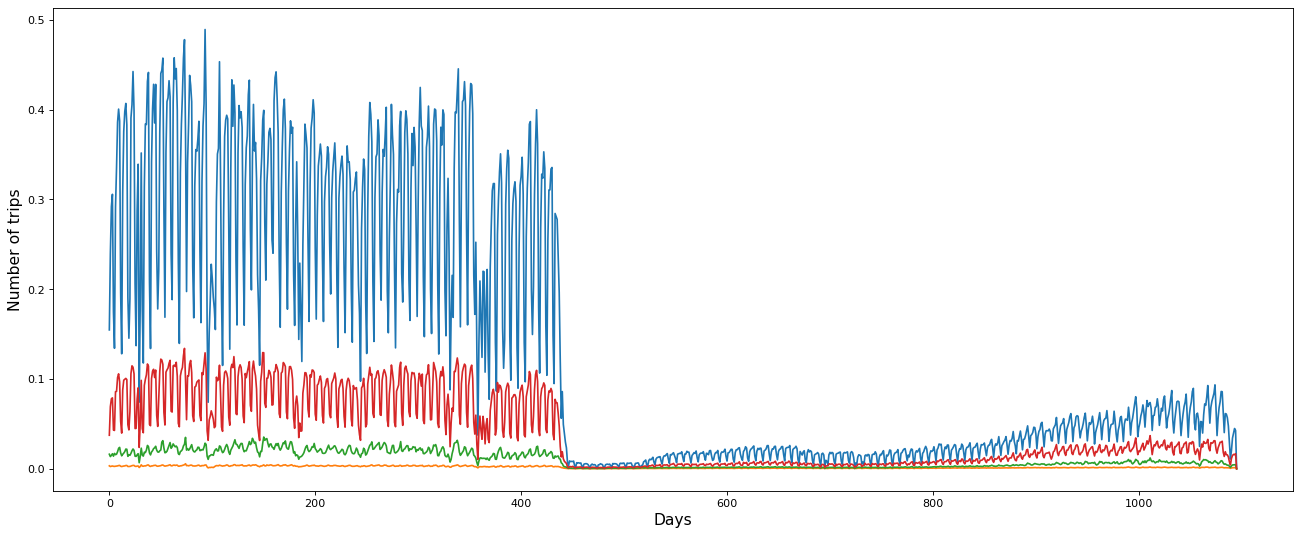

In [35]:
plt.figure(figsize=(20,8),dpi=80)
for centroid in model.centroids:    
    plt.plot(np.arange(len(centroid)), centroid)
    plt.xlabel('Days',fontsize=14)
    plt.ylabel('Number of trips',fontsize=14)

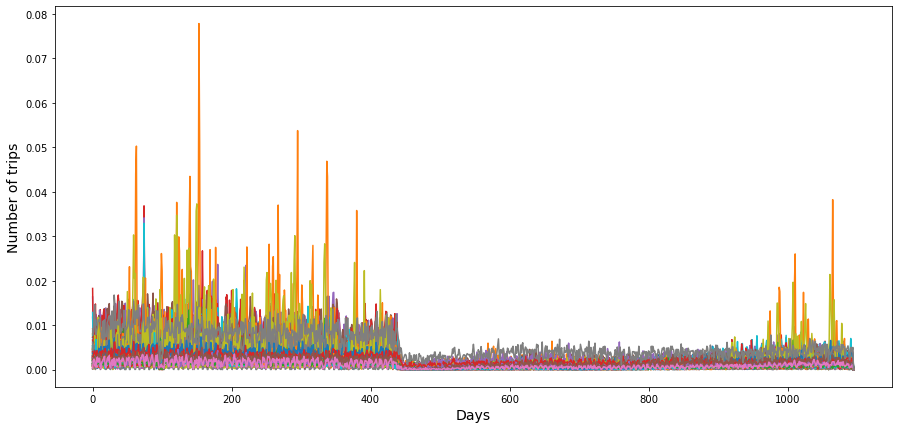

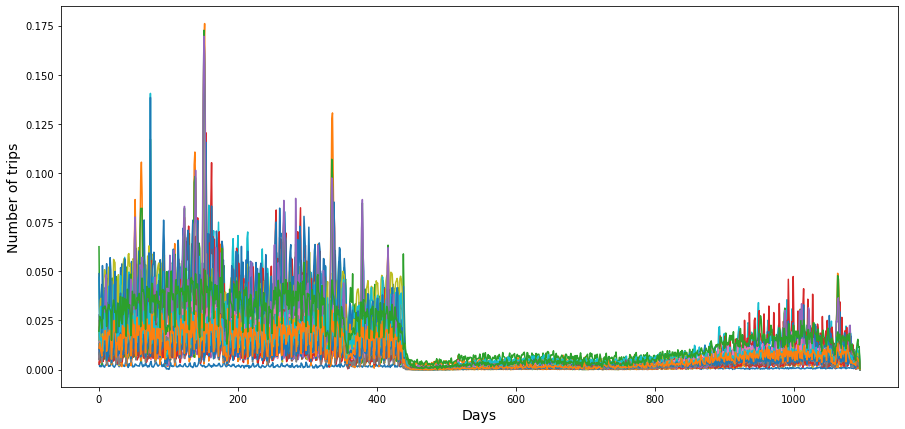

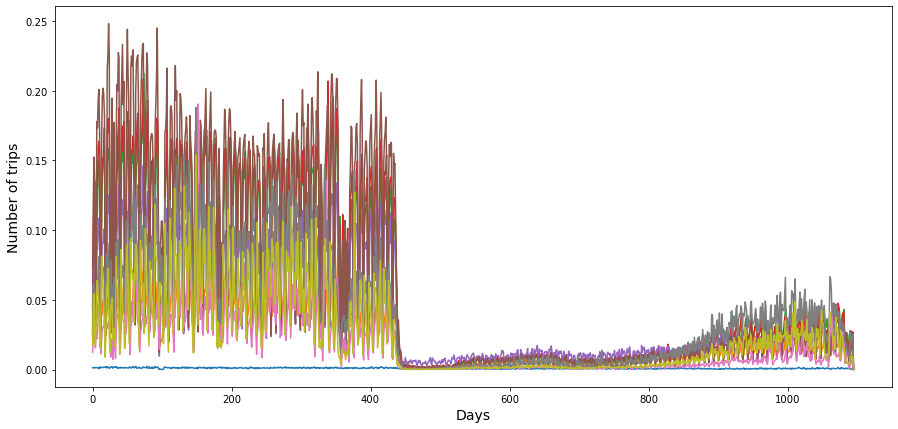

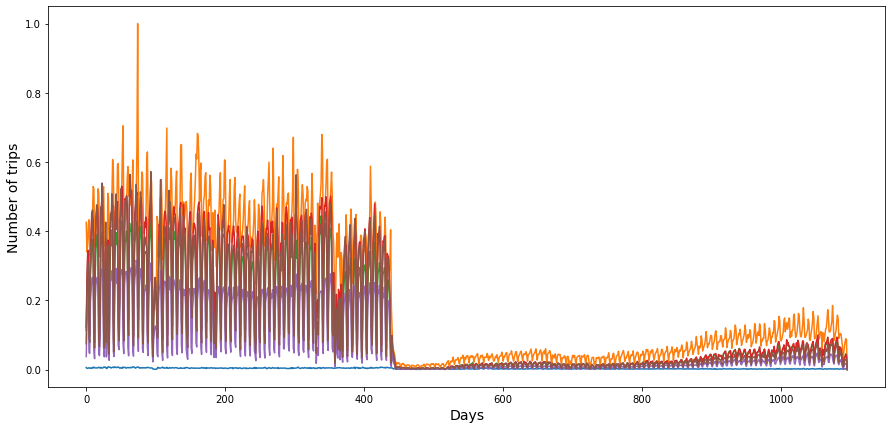

In [36]:
for centroid_key in model.clusters:
    plt.figure(figsize=(15,7))
    centroid = odtrips[centroid_key]
    plt.plot(np.arange(len(centroid)), centroid)
    plt.xlabel('Days',fontsize=14)
    plt.ylabel('Number of trips',fontsize=14)
    for series_index in model.clusters[centroid_key]:
        series = odtrips[series_index]
        plt.plot(np.arange(len(series)), series)
    
    plt.show()

8 Cluster

In [11]:
model = DTWClustering(odtrips, 8)
model.train()

0.0006656999999847812 queue placement complete
1288.9550033 computations complete
1288.9679861 iteration complete
0.0005693999999039079 queue placement complete
1270.2214333 computations complete
1270.2252694000001 iteration complete
0.0005716999999094696 queue placement complete
1253.3114338999999 computations complete
1253.3150194 iteration complete
0.0005831000003126974 queue placement complete
1246.6943603 computations complete
1246.6980541000003 iteration complete
0.0005593999994744081 queue placement complete
1396.8624203 computations complete
1396.867569 iteration complete
0.0005923999997321516 queue placement complete
1512.366467499999 computations complete
1512.4038456000007 iteration complete
0.0012556000001495704 queue placement complete
1688.2254389000009 computations complete
1688.2786734000001 iteration complete
0.001039499999023974 queue placement complete
1918.8588946 computations complete
1918.934642099999 iteration complete
0.0012169000001449604 queue placement comple

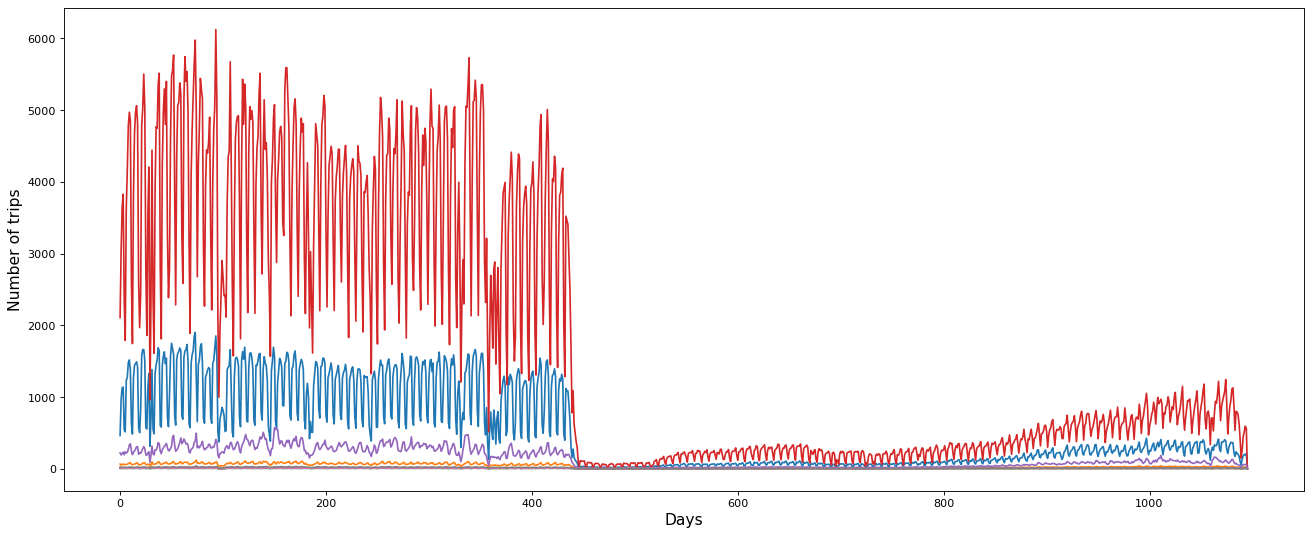

In [12]:
plt.figure(figsize=(20,8),dpi=80)
for centroid in model.centroids:    
    plt.plot(np.arange(len(centroid)), centroid)
    plt.xlabel('Days',fontsize=14)
    plt.ylabel('Number of trips',fontsize=14)

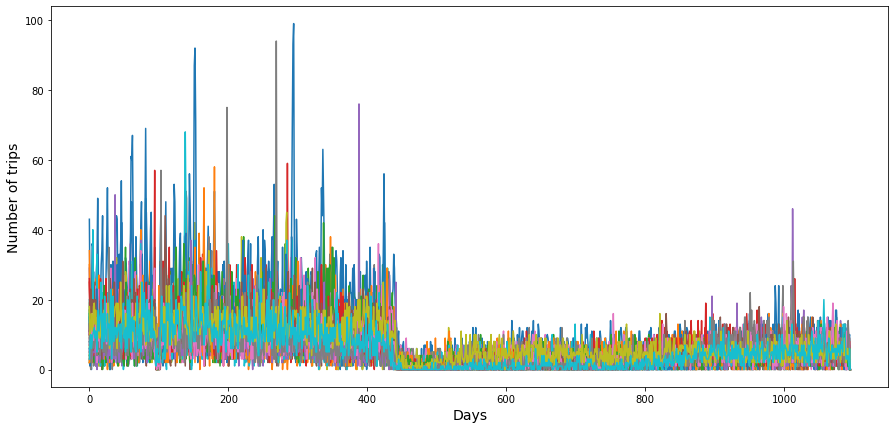

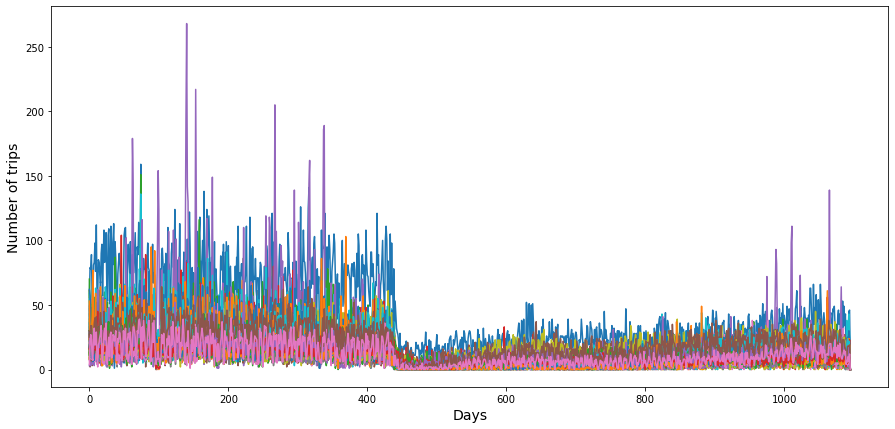

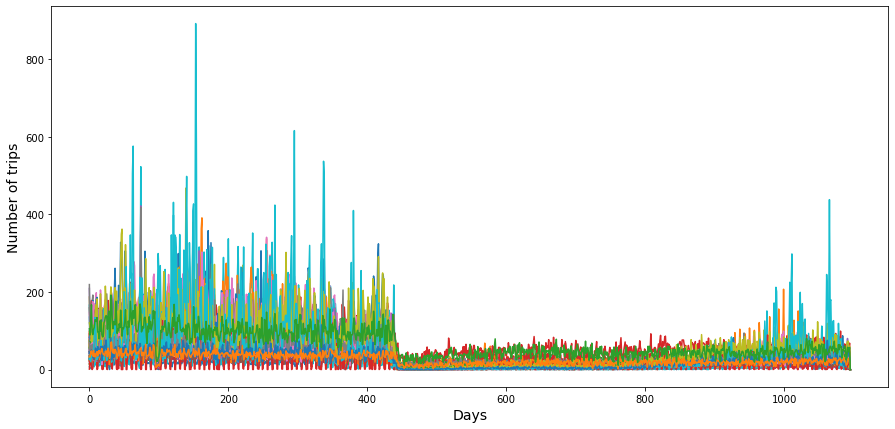

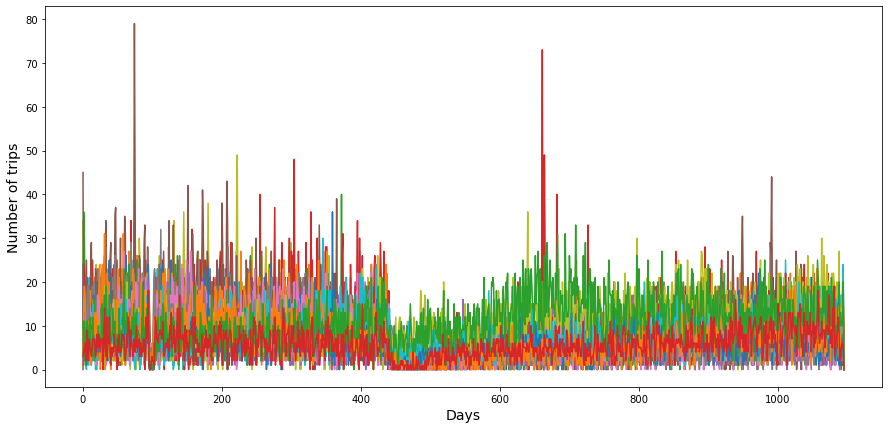

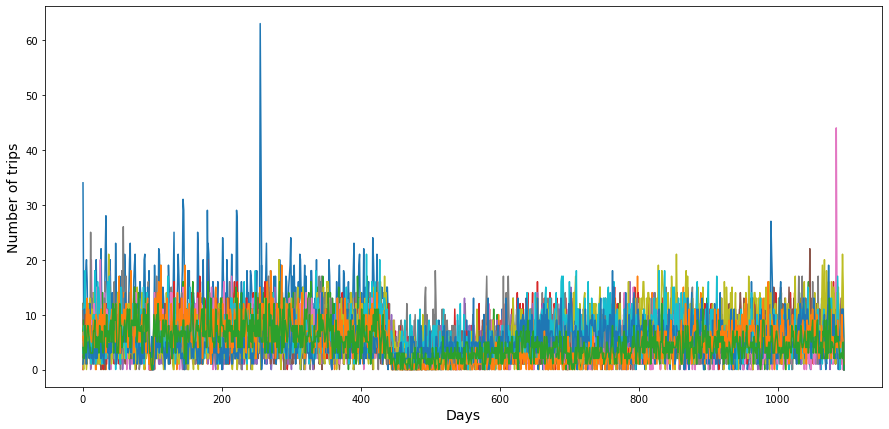

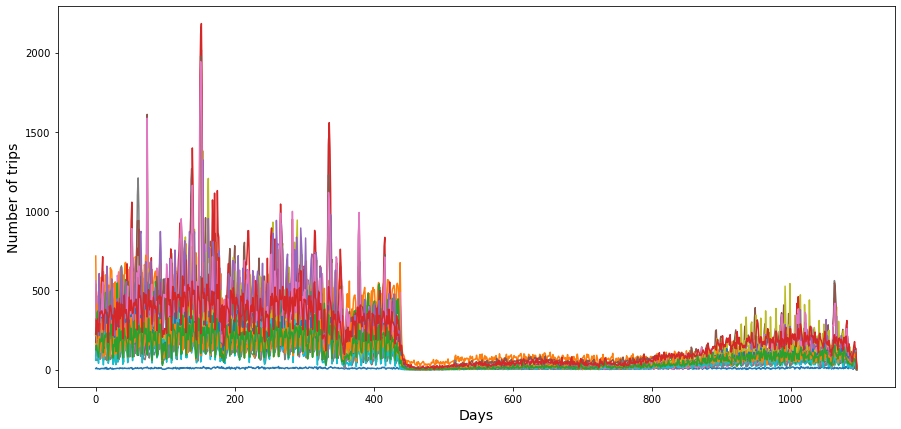

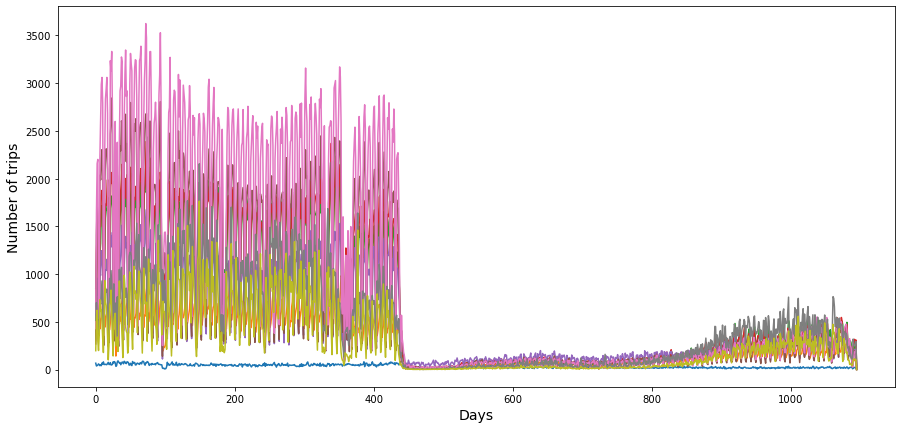

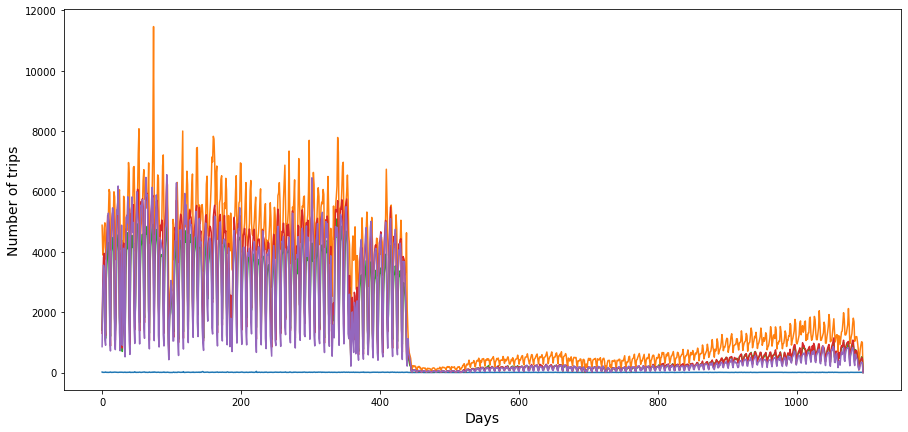

In [13]:
for centroid_key in model.clusters:
    plt.figure(figsize=(15,7))
    centroid = odtrips[centroid_key]
    plt.plot(np.arange(len(centroid)), centroid)
    plt.xlabel('Days',fontsize=14)
    plt.ylabel('Number of trips',fontsize=14)
    for series_index in model.clusters[centroid_key]:
        series = odtrips[series_index]
        plt.plot(np.arange(len(series)), series)
    
    plt.show()

In [15]:
model.clusters

{5: [2,
  3,
  9,
  17,
  21,
  23,
  26,
  28,
  38,
  43,
  46,
  55,
  68,
  82,
  87,
  90,
  93,
  92,
  98,
  109,
  111,
  113,
  127,
  138,
  145,
  161,
  164,
  165,
  167,
  171,
  173,
  176,
  200,
  207,
  220,
  221,
  233,
  239,
  245],
 7: [1,
  5,
  15,
  20,
  27,
  32,
  33,
  37,
  39,
  40,
  50,
  51,
  54,
  56,
  59,
  64,
  65,
  66,
  72,
  75,
  76,
  86,
  89,
  91,
  99,
  101,
  103,
  105,
  107,
  108,
  112,
  118,
  124,
  131,
  134,
  140,
  146,
  147,
  151,
  155,
  154,
  157,
  172,
  174,
  181,
  188,
  190,
  192,
  197,
  198,
  201,
  205,
  210,
  211,
  218,
  219,
  222,
  223,
  224,
  226,
  232,
  236,
  237,
  240,
  242,
  244],
 1: [0,
  7,
  14,
  16,
  18,
  22,
  25,
  31,
  35,
  41,
  42,
  44,
  45,
  47,
  52,
  53,
  58,
  60,
  67,
  79,
  81,
  84,
  94,
  96,
  100,
  104,
  106,
  114,
  115,
  126,
  135,
  139,
  141,
  148,
  158,
  160,
  163,
  168,
  175,
  202,
  204,
  206,
  208,
  212,
  213,
  214,
  227,


In [11]:
from matplotlib.pyplot import MultipleLocator

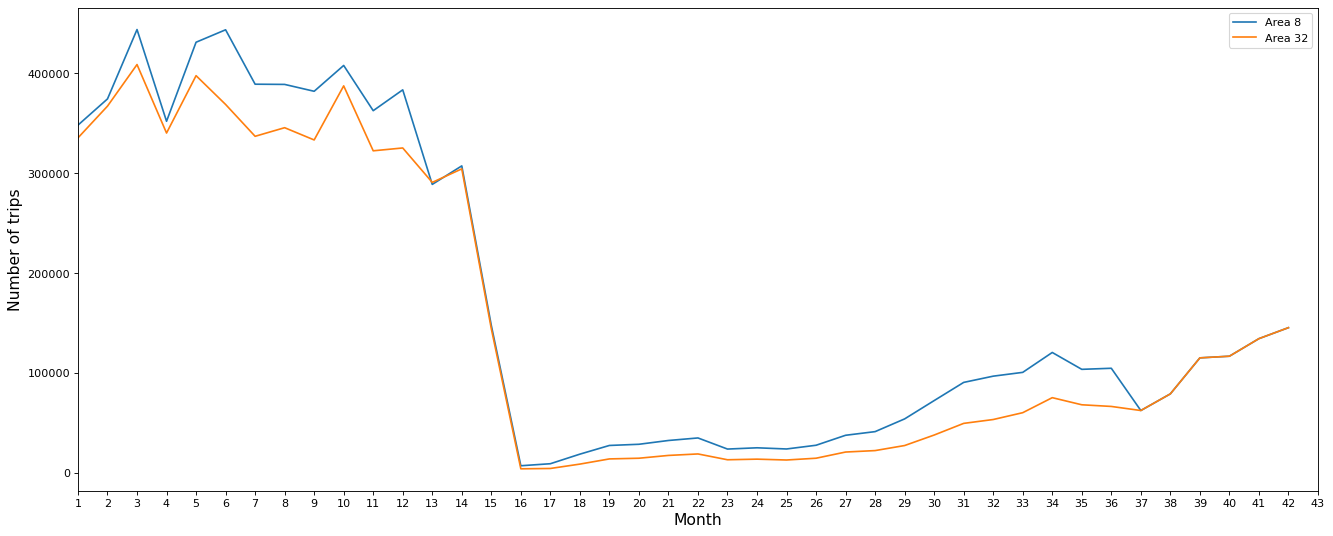

In [70]:
x=list(range(1,43))
plt.figure(figsize=(20,8),dpi=80)
plt.plot(x,y_8,label='Area 8')
plt.plot(x,y_32,label='Area 32')
x_major_locator=MultipleLocator(1)
#把x轴的刻度间隔设置为1，并存在变量里
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
#把x轴的主刻度设置为1的倍数

plt.xlabel('Month',fontsize=14)
plt.ylabel('Number of trips',fontsize=14)
plt.xlim(1,43)
plt.legend()
plt.show()


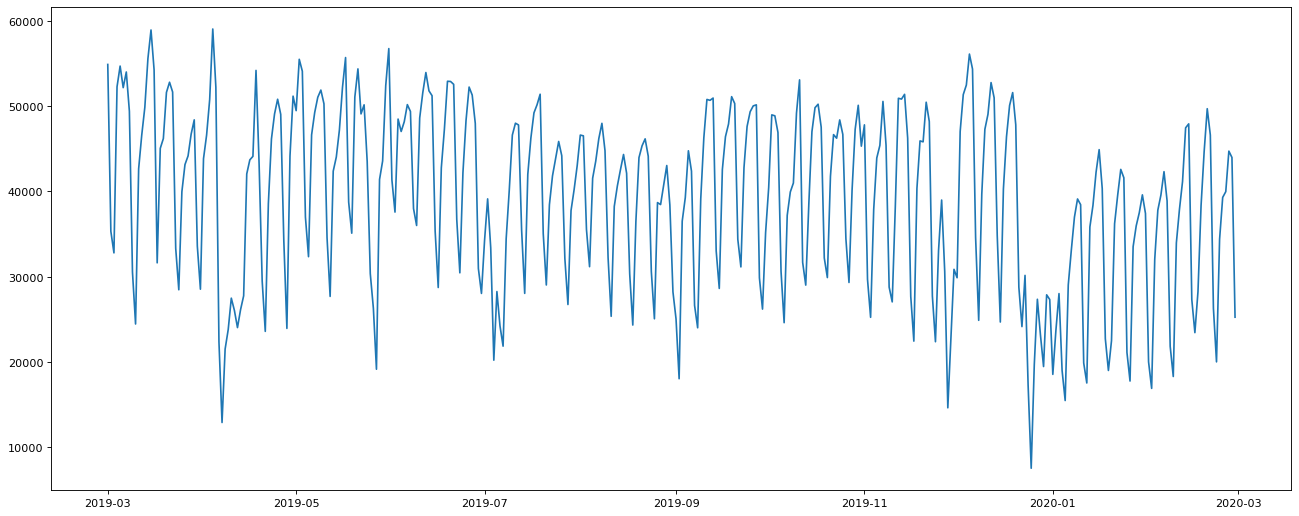

In [40]:
x=pd.date_range('3/1/2019','2/29/2020')
plt.figure(figsize=(20,8),dpi=80)
plt.plot(x,count[x])

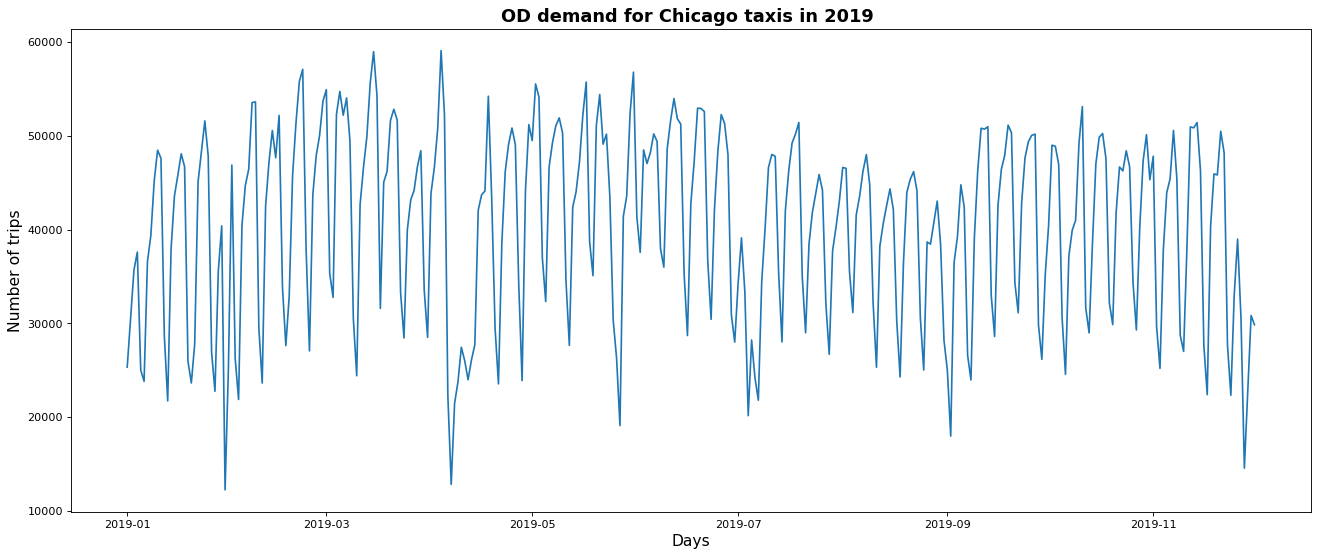

In [192]:
x=pd.date_range('1/1/2019','12/1/2019')
plt.figure(figsize=(20,8),dpi=80)
plt.plot(x,count[x])
plt.title('OD demand for Chicago taxis in 2019 ',fontsize=16,fontweight='bold')
plt.xlabel('Days',fontsize=14)
plt.ylabel('Number of trips',fontsize=14)

plt.savefig('./OD_demand_2019',bbox_inches = 'tight')

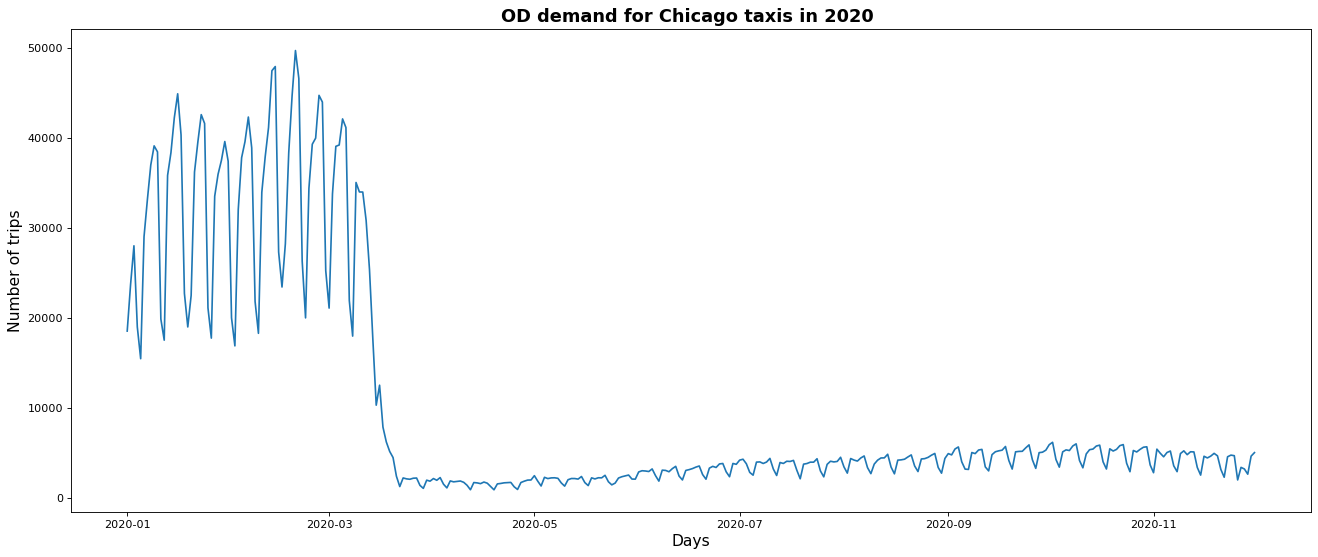

In [149]:
x=pd.date_range('1/1/2020','12/1/2020')
plt.figure(figsize=(20,8),dpi=80)
plt.plot(x,count[x])
plt.title('OD demand for Chicago taxis in 2020 ',fontsize=16,fontweight='bold')
plt.xlabel('Days',fontsize=14)
plt.ylabel('Number of trips',fontsize=14)

plt.savefig('./OD_demand_2020',bbox_inches = 'tight')

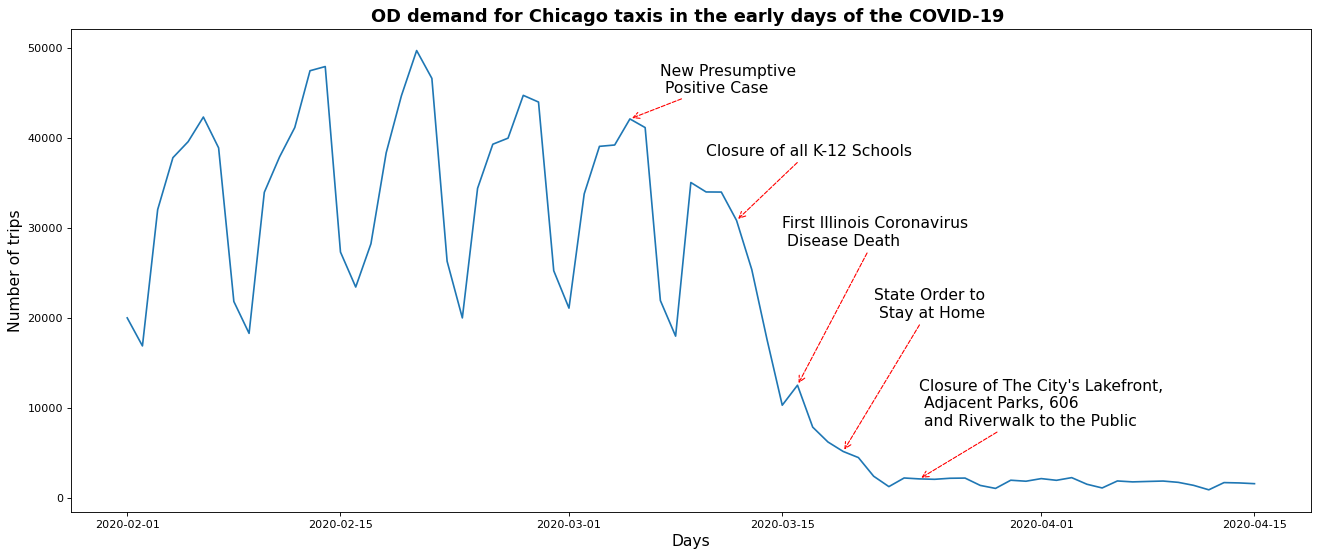

In [186]:
x=pd.date_range('2/1/2020','4/15/2020')
plt.figure(figsize=(20,8),dpi=80)
plt.plot(x,count[x])
plt.annotate("New Presumptive \n Positive Case", xy = (x[33], count[x[33]]), xytext= (x[35], 45000),color = "k", fontsize=14,arrowprops = dict(arrowstyle="->",linestyle="--",color = "r"))
plt.annotate("Closure of all K-12 Schools", xy = (x[40], count[x[40]]), xytext= (x[38], 38000),color = "k", fontsize=14,arrowprops = dict(arrowstyle="->",linestyle="--",color = "r"))
plt.annotate("First Illinois Coronavirus \n Disease Death", xy = (x[44], count[x[44]]), xytext= (x[43], 28000),color = "k", fontsize=14,arrowprops = dict(arrowstyle="->",linestyle="--",color = "r"))
plt.annotate("State Order to \n Stay at Home", xy = (x[47], count[x[47]]), xytext= (x[49], 20000),color = "k", fontsize=14,arrowprops = dict(arrowstyle="->",linestyle="--",color = "r"))
plt.annotate("Closure of The City's Lakefront, \n Adjacent Parks, 606 \n and Riverwalk to the Public", xy = (x[52], count[x[52]]), xytext= (x[52], 8000),color = "k", fontsize=14,arrowprops = dict(arrowstyle="->",linestyle="--",color = "r"))
plt.title('OD demand for Chicago taxis in the early days of the COVID-19 ',fontsize=16,fontweight='bold')
plt.xlabel('Days',fontsize=14)
plt.ylabel('Number of trips',fontsize=14)

plt.savefig('./OD_demand_early',bbox_inches = 'tight')
#ax.text(x[8], count[x[8]]*0.9, "csh", fontsize=12, color = "r", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='right', rotation=90)

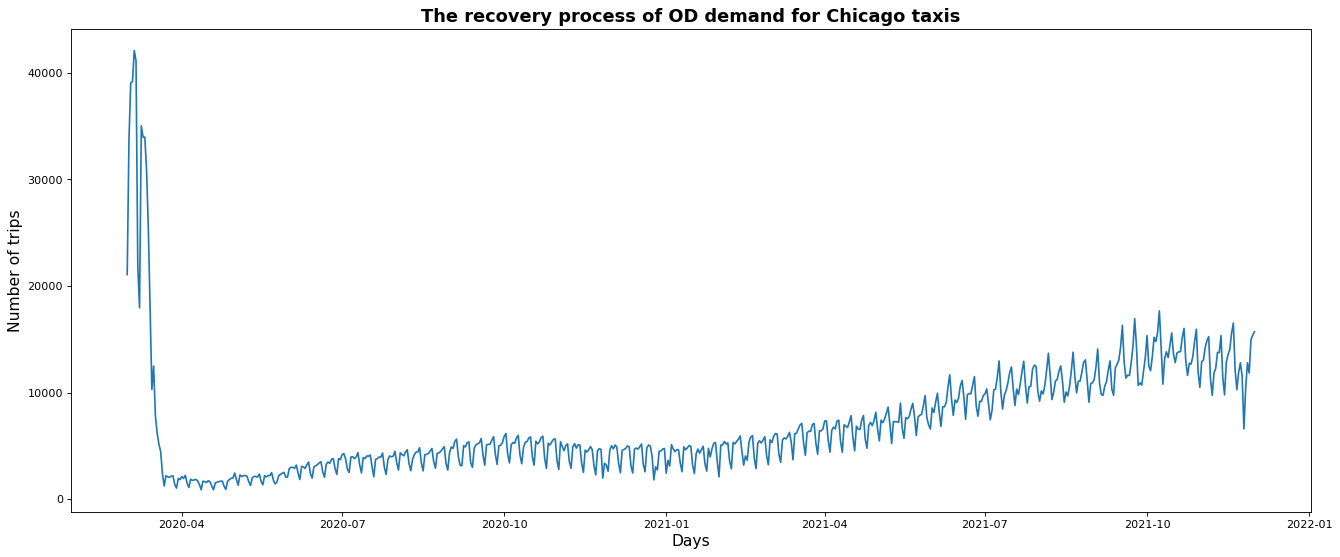

In [157]:
x=pd.date_range('3/1/2020','12/1/2021')
plt.figure(figsize=(20,8),dpi=80)
plt.plot(x,count[x])

plt.title('The recovery process of OD demand for Chicago taxis',fontsize=16,fontweight='bold')
plt.xlabel('Days',fontsize=14)
plt.ylabel('Number of trips',fontsize=14)

plt.savefig('./OD_demand_Recovery',bbox_inches = 'tight')

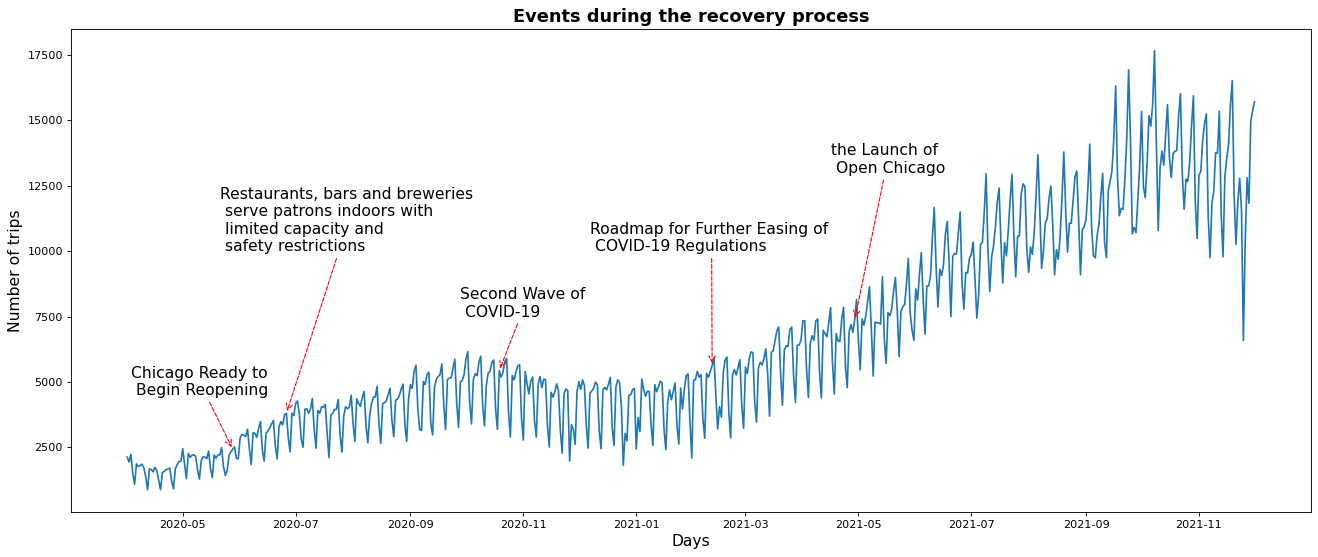

In [193]:
x=pd.date_range('4/1/2020','12/1/2021')
plt.figure(figsize=(20,8),dpi=80)
plt.plot(x,count[x])
plt.annotate("Chicago Ready to\n Begin Reopening", xy = (x[57], count[x[57]]), xytext= (x[2], 4500),color = "k", fontsize=14,arrowprops = dict(arrowstyle="->",linestyle="--",color = "r"))
plt.annotate("Restaurants, bars and breweries \n serve patrons indoors with \n limited capacity and \n safety restrictions", xy = (x[86], count[x[86]]), xytext= (x[50], 10000),color = "k", fontsize=14,arrowprops = dict(arrowstyle="->",linestyle="--",color = "r"))
plt.annotate("Second Wave of \n COVID-19", xy = (x[201], count[x[201]]), xytext= (x[180], 7500),color = "k", fontsize=14,arrowprops = dict(arrowstyle="->",linestyle="--",color = "r"))
plt.annotate("Roadmap for Further Easing of \n COVID-19 Regulations", xy = (x[316], count[x[316]]), xytext= (x[250], 10000),color = "k", fontsize=14,arrowprops = dict(arrowstyle="->",linestyle="--",color = "r"))
plt.annotate("the Launch of \n Open Chicago", xy = (x[393], count[x[393]]), xytext= (x[380], 13000),color = "k", fontsize=14,arrowprops = dict(arrowstyle="->",linestyle="--",color = "r"))
plt.title('Events during the recovery process',fontsize=16,fontweight='bold')
plt.xlabel('Days',fontsize=14)
plt.ylabel('Number of trips',fontsize=14)

plt.savefig('./Event_recovery_process',bbox_inches = 'tight')